# Clustering Localities in Bangalore based on Restaurants
**In this project, we will cluster different localities in Bangalore, India.**

**First, we will collect the data of restaurants from the Foursquare API and Zomato API.**  
**We will collect data such as name of the restaurant, latitude, longitude, price, rating and locality.**

**Second, we will group by Locality and then use K-means clustering algorithm to cluster the various Localities in terms of price and ratings of restaurants present in the Locality.**

In [32]:
# The code was removed by Watson Studio for sharing.

### Install Follium
Folium is a powerful Python library that helps you create several types of Leaflet maps.  
We will use Folium library to render a map of Bangalore and marking the different localities clustered with different colours.  
Folium is not available by default. So, we first need to install it before we are able to import it.

In [21]:
!conda install -c conda-forge folium=0.5.0 --yes
print('Folium installed!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [3]:
import folium

# Using Foursquare API get a list of all venues in Bangalore
**Using Foursquare API, we will retrieve a list of all venues in Bangalore within a radius of 35 kms.**   
**We will retrive the Venue name, category and its location (latitude and longitude) values.**

In [33]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

pd.set_option('display.max_rows', None)

CLIENT_ID = 'EC2EBXWZ0UCR2FO5L3BWV43HNEFTJD01VFUKCJ4M2YGEQRXF' # your Foursquare ID
CLIENT_SECRET = '24ZRUVEYAN4FLN40UZFXWLS1ZSAZXMGVWVHUGHMYC3FNKFJK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 1000
RADIUS = 35000 

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(CLIENT_ID, 
                                                                        CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        BLR_LATITUDE, 
                                                                        BLR_LONGITUDE, 
                                                                        RADIUS,
                                                                        LIMIT,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    #print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)

    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched".format(total_venues))



Total 242 venues fetched


In [35]:
foursquare_venues

,name,categories,lat,lng
0,JW Marriott Hotel Bengaluru,Hotel,12.972362,77.595051
1,UB City,Shopping Mall,12.971709,77.595905
2,Cubbon Park,Park,12.977042,77.595277
3,Truffles - Ice & Spice,Burger Joint,12.971802,77.601031
4,Toscano,Italian Restaurant,12.971980,77.596066
5,Smoke House Deli,Deli / Bodega,12.971656,77.598254
6,J W Kitchen,Asian Restaurant,12.972410,77.594592
7,Hard Rock Cafe Bengaluru,American Restaurant,12.976389,77.601468
8,Corner House,Ice Cream Shop,12.972979,77.599971
9,Shiro,Japanese Restaurant,12.971900,77.596236


# Using Zomato API to fetch additional restaurant data
**We will use Zomato API to fetch locality, average cost for two, price range and user rating of the restaurants fetched using the Foursquare API.  
The Zomato Search API takes in as input: name of the restaurant and its location values.  
Using the venues fetched from Foursquare API, we will get these additional information for only the restaurants.  
Any other venues such as shopping mall, gym, park etc are ignored since we will focus only on restaurants.  
Zomato API has only restaurants in its database unlike Foursquare API which has information on all venues.**

In [ ]:
#Zomato API to fetch results from its database
headers = {'user-key': 'a06dcbde7f898df8a5243c61256ca335'}
venues_information = []

for index, row in foursquare_venues.iterrows():
    #print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    result = requests.get(url, headers = headers).json()
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['locality'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venues_information.append(venue)


#### Save the information retrived using Zomato API in a csv file
We save the dataframe into a csv file because Zomato API allows only 1000 freecalls a day.  
Since the data is fixed, we do not want to call the API again and again. Instead we store the data in a csv file with our project.

In [28]:
columnHeader = ['venue', 'latitude', 'longitude','locality', 'price_for_two','price_range', 'rating']
zomato_venues = pd.DataFrame(venues_information,columns=columnHeader)
zomato_venues.to_csv('zomato_data.csv') 

In [ ]:
#Getting csv file and loading as pandas datafarme
file_data=open('zomato_data.csv', 'rb')
project.save_data(data=file_data.read(),file_name='zomato_data.csv',overwrite=True)
file_data.close() 

In [37]:
# The code was removed by Watson Studio for sharing.

In [38]:
zomato_data

,Unnamed: 0,venue,latitude,longitude,locality,price_for_two,price_range,rating
0,0,ROYCE' Chocolate,12.972469,77.595103,"JW Marriott Bengaluru, Lavelle Road",1000,3,3.5
1,1,Shiro,12.971758,77.595922,UB City,3000,4,4.4
2,2,Mathsya Darshini,12.975296,77.588858,Lavelle Road,350,1,3.4
3,3,Truffles,12.971769,77.601137,St. Marks Road,900,2,4.4
4,4,Shiro,12.971758,77.595922,UB City,3000,4,4.4
5,5,Smoke House Deli,12.971659,77.598318,Lavelle Road,1600,3,4.7
6,6,ROYCE' Chocolate,12.972469,77.595103,"JW Marriott Bengaluru, Lavelle Road",1000,3,3.5
7,7,Hard Rock Cafe,12.976034,77.601567,St. Marks Road,2500,4,4.5
8,8,Corner House Ice Cream,12.973186,77.599967,Lavelle Road,350,1,4.4
9,9,Shiro,12.971758,77.595922,UB City,3000,4,4.4


# Data Cleaning
1. Drop Duplicate rows : 
    Using Foursqure API we retrieved all venues in Bangalore within 35km radius.  
    There can a shopping mall at a particular location and inside the mall there could be a restaurant and a lounge.  
    So all these 3 venues the shopping mall, the restaurant and the lounge will have the same latitue and longitude values.  
    When we try to search for these location values using the zomato API, the query with the shopping mall would result with restaurant the mall has.  
    Therefore, we drop these duplicate values.  
2. Clean locality column :  
    The Zomato API's locality information is not consistent.   
    In order to make this information compatible the geopy API, we do some cleaning on the locality column.  
3. Drop Price_range column because it is redundant.  
    Price_for_two column indicates the same feature.


In [40]:
zomato_data.drop_duplicates(subset='venue', inplace = True)
zomato_data.reset_index(inplace = True)
zomato_data = zomato_data.loc[:, ~zomato_data.columns.str.contains('^Unnamed')]
zomato_data = zomato_data.loc[:, ~zomato_data.columns.str.contains('index')]

zomato_data.head()

,venue,latitude,longitude,locality,price_for_two,price_range,rating
0,ROYCE' Chocolate,12.972469,77.595103,"JW Marriott Bengaluru, Lavelle Road",1000,3,3.5
1,Shiro,12.971758,77.595922,UB City,3000,4,4.4
2,Mathsya Darshini,12.975296,77.588858,Lavelle Road,350,1,3.4
3,Truffles,12.971769,77.601137,St. Marks Road,900,2,4.4
4,Smoke House Deli,12.971659,77.598318,Lavelle Road,1600,3,4.7


In [41]:
# 2. Clean locality column
zomato_data['locality'].replace(to_replace='.*Koramangala.*',value='Koramangala',inplace=True, regex=True)
zomato_data['locality'].replace(to_replace='.*Lavelle Road.*',value='Lavelle Road',inplace=True, regex=True)
zomato_data['locality'].replace(to_replace='.*MG Road.*',value='MG Road',inplace=True, regex=True)
zomato_data['locality'].replace(to_replace='.*Race Course Road.*',value='Race Course Road',inplace=True, regex=True)

zomato_data['locality'].replace(to_replace='.*Brigade Road.*',value='Brigade Road',inplace=True, regex=True)
zomato_data['locality'].replace(to_replace='.*Whitefield.*',value='Whitefield',inplace=True, regex=True)
zomato_data['locality'].replace(to_replace='.*Malleshwaram.*',value='Malleshwaram',inplace=True, regex=True)
zomato_data['locality'].replace(to_replace='.*Vasanth Nagar.*',value='Vasanth Nagar',inplace=True, regex=True)

zomato_data['locality'].replace(to_replace='.*International Airport.*',value='Kempegowda International Airport',inplace=True, regex=True)
zomato_data['locality'].replace(to_replace='.*Ulsoor.*',value='Ulsoor',inplace=True, regex=True)
zomato_data['locality'].replace(to_replace='.*Old Airport Road.*',value='Old Airport Road',inplace=True, regex=True)
zomato_data['locality'].replace(to_replace='.*Indiranagar.*',value='Indiranagar',inplace=True, regex=True)

zomato_data['locality'].replace(to_replace='.*Sankey Road.*',value='Sankey Road',inplace=True, regex=True)
zomato_data['locality'].replace(to_replace='.*Banaswadi.*',value='Banaswadi',inplace=True, regex=True)
zomato_data['locality'].replace(to_replace='.*Richmond.*',value='Richmond',inplace=True, regex=True)
zomato_data['locality'].replace(to_replace='.*Yeshwantpur.*',value='Yeshwantpur',inplace=True, regex=True)

zomato_data['locality'].replace(to_replace='.*Windmills Craftworks.*',value='Whitefield',inplace=True, regex=True)
zomato_data['locality'].replace(to_replace='.*Brigade Gateway.*',value='Rajajinagar',inplace=True, regex=True)
zomato_data['locality'].replace(to_replace='.*Sadashiv Nagar.*',value='Sadashiva Nagar',inplace=True, regex=True)


zomato_data.head()

,venue,latitude,longitude,locality,price_for_two,price_range,rating
0,ROYCE' Chocolate,12.972469,77.595103,Lavelle Road,1000,3,3.5
1,Shiro,12.971758,77.595922,UB City,3000,4,4.4
2,Mathsya Darshini,12.975296,77.588858,Lavelle Road,350,1,3.4
3,Truffles,12.971769,77.601137,St. Marks Road,900,2,4.4
4,Smoke House Deli,12.971659,77.598318,Lavelle Road,1600,3,4.7


In [ ]:
# 3. drop Price_range column because it is a redundant feature. Price_for_two column indicates the same feature
zomato_data.drop('price_range',axis=1, inplace=True)

# Data Analysis

In [125]:
# Lets get a count of the number of restaurants in each Locality
counts = zomato_data['locality'].value_counts().to_frame()
counts

,locality
Indiranagar,18
Koramangala,15
Malleshwaram,11
Whitefield,9
Jayanagar,9
Basavanagudi,9
Rajajinagar,8
Residency Road,7
Lavelle Road,6
Church Street,6


<BarContainer object of 57 artists>

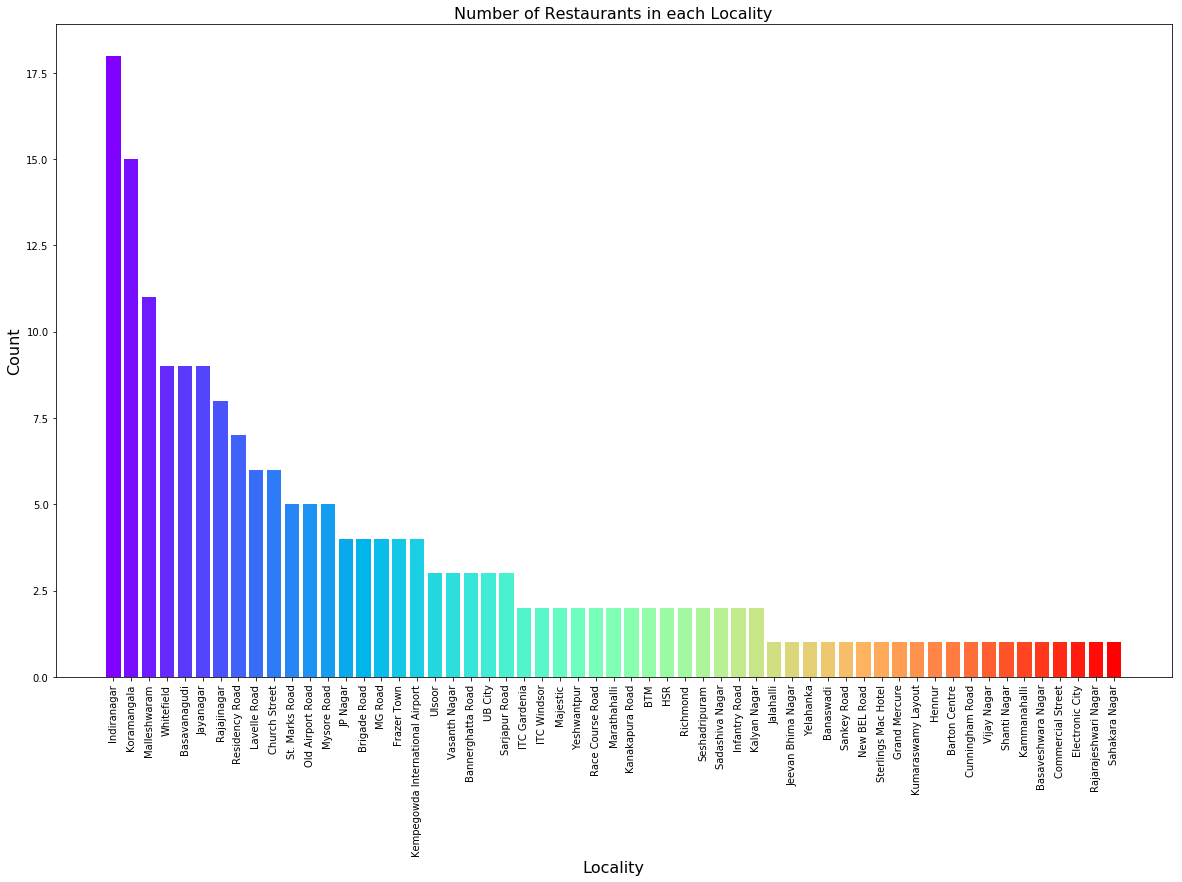

In [42]:
locality_distribution = zomato_data['locality'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(locality_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Locality", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Number of Restaurants in each Locality", fontsize = 16)
plt.bar(locality_distribution.index, locality_distribution.values, color = colors)

From the above graph we can see that the locality with the most number of restaurants is **Indiranagar**, followed by **Koramangala** and **Malleshwaram**.    
As a tourist we can plan to visit above localities for a maximum variety in the number of different restaurants to visit.

In [50]:
#Average Price and ratings of restaurants in each Locality
locality = zomato_data[['locality','price_for_two','rating']]
locality_grouped = locality.groupby('locality').mean().reset_index()
locality_grouped

,locality,price_for_two,rating
0,BTM,300.000000,3.450000
1,Banaswadi,500.000000,3.500000
2,Bannerghatta Road,616.666667,4.066667
3,Barton Centre,1800.000000,4.400000
4,Basavanagudi,250.000000,3.788889
5,Basaveshwara Nagar,200.000000,4.000000
6,Brigade Road,1300.000000,4.175000
7,Church Street,925.000000,4.350000
8,Commercial Street,100.000000,3.500000
9,Cunningham Road,1000.000000,4.300000


<BarContainer object of 57 artists>

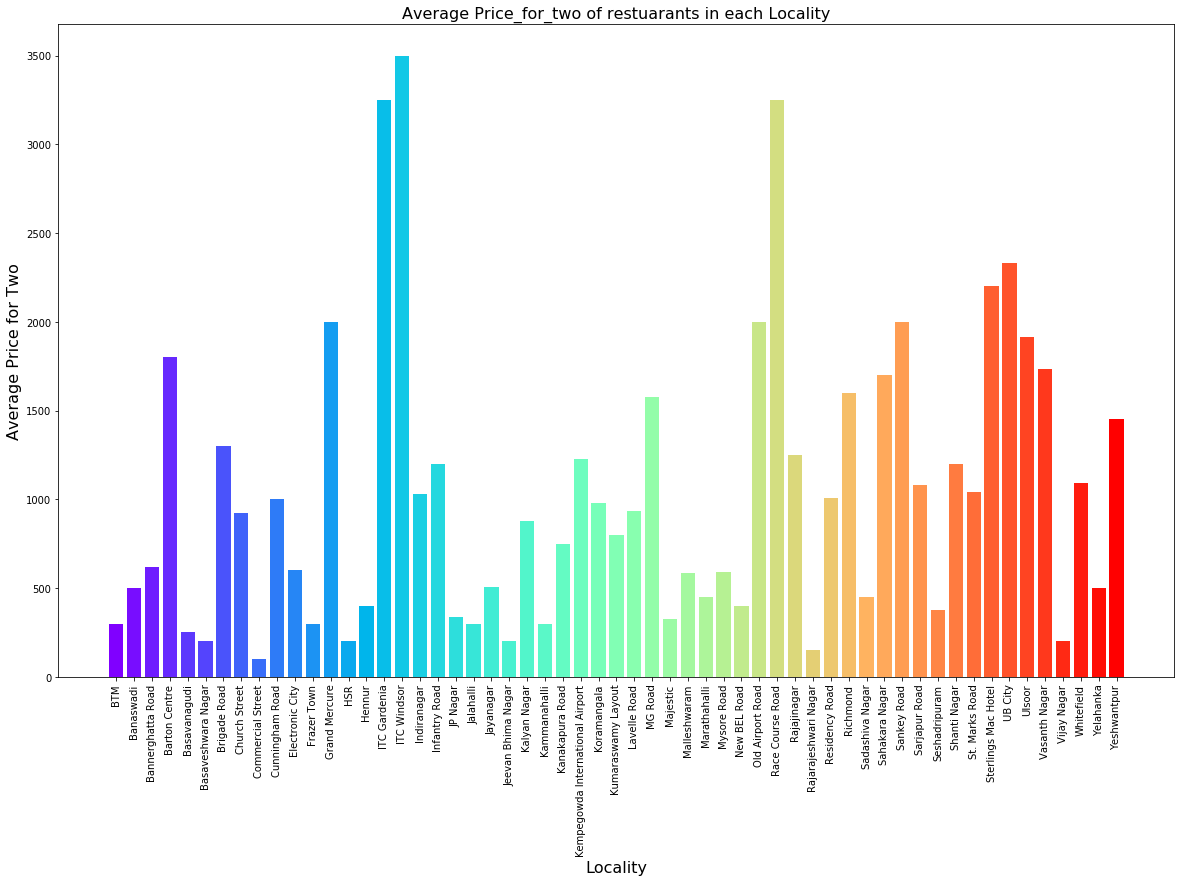

In [53]:
colors = cm.rainbow(np.linspace(0, 1, len(locality_grouped.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Locality", fontsize = 16)
plt.ylabel("Average Price for Two", fontsize = 16)
plt.title("Average Price_for_two of restuarants in each Locality", fontsize = 16)
plt.bar(locality_grouped['locality'], locality_grouped['price_for_two'], color = colors)

**Looking at the above graph, a visitor can choose restaurants in particular locality based on his budget preferences.**  
**A similar analysis can be done for the average ratings of the restaurant in each locality.**

<BarContainer object of 57 artists>

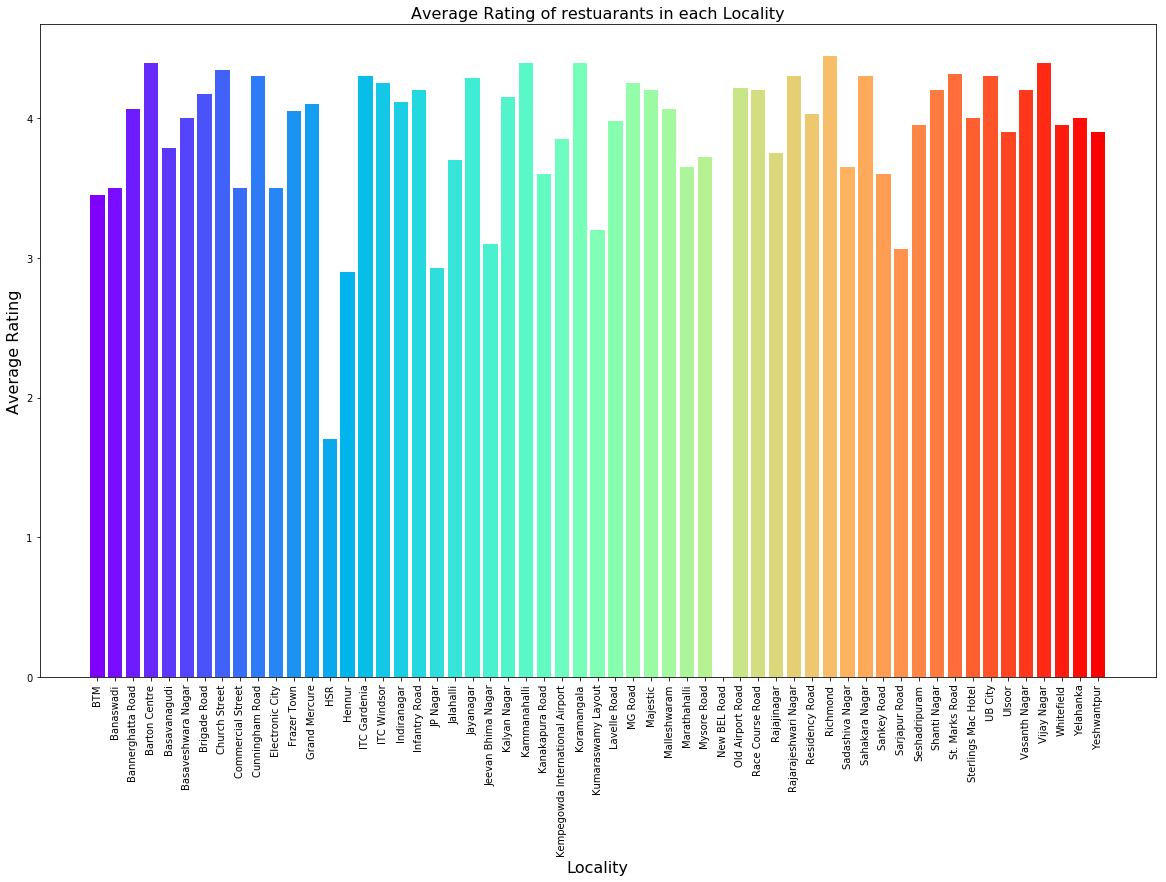

In [54]:
colors = cm.rainbow(np.linspace(0, 1, len(locality_grouped.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Locality", fontsize = 16)
plt.ylabel("Average Rating", fontsize = 16)
plt.title("Average Rating of restuarants in each Locality", fontsize = 16)
plt.bar(locality_grouped['locality'], locality_grouped['rating'], color = colors)

In [127]:
locality_grouped.shape

(57, 3)

# Machine Learning Algorithm - K-Means Clustering 

## To find the best value of k in k-means clustering we will use the elbow method.

[36960155.5044105, 11584262.422737407, 5723686.6344478205, 1732953.7839283922, 1197328.2233891264, 737659.6925127222, 514886.9871306471, 411662.86218660977, 310384.5305640229, 238112.22594363682]


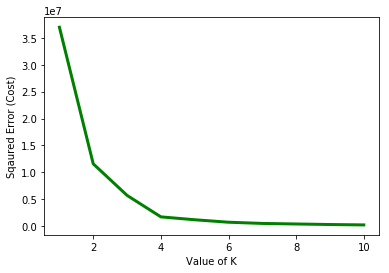

In [55]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

locality_grouped_clustering = locality_grouped.drop('locality', 1)

cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(locality_grouped_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
print(cost)
plt.show() # clear the plot 

Looking at the above graph, we can either choose k=2 or k=4. 
I choose k=4

In [25]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(locality_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([2, 2, 2, 0, 2, 2, 1, 1, 2, 1], dtype=int32)

In [56]:
# add clustering labels
locality_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

locality_grouped_data = locality_grouped

#drop out the columns ['price_for_two', 'rating']
locality_grouped.drop(['price_for_two', 'rating'], axis = 1, inplace=True);

locality_merged = zomato_data

locality_merged = locality_merged.join(locality_grouped.set_index('locality'), on='locality')

locality_merged.head(60) 

,venue,latitude,longitude,locality,price_for_two,price_range,rating,Cluster Labels
0,ROYCE' Chocolate,12.972469,77.595103,Lavelle Road,1000,3,3.5,1
1,Shiro,12.971758,77.595922,UB City,3000,4,4.4,0
2,Mathsya Darshini,12.975296,77.588858,Lavelle Road,350,1,3.4,1
3,Truffles,12.971769,77.601137,St. Marks Road,900,2,4.4,1
4,Smoke House Deli,12.971659,77.598318,Lavelle Road,1600,3,4.7,1
5,Hard Rock Cafe,12.976034,77.601567,St. Marks Road,2500,4,4.5,1
6,Corner House Ice Cream,12.973186,77.599967,Lavelle Road,350,1,4.4,1
7,Masala Klub - The Taj West End,12.984113,77.583968,Race Course Road,4000,4,4.4,3
8,Harima,12.967536,77.599901,Residency Road,2000,4,4.3,1
9,Edo Restaurant & Bar - ITC Gardenia,12.967392,77.596392,ITC Gardenia,4000,4,4.3,3


### Install Geopy API so that we can convert an address into latitude and longitude values

In [88]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geographiclib-1.49   | 32 KB     | ##################################### | 100% 
geopy-1.20.0         | 57 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [140]:
def get_geocoder(locality):
    geolocator = Nominatim(user_agent="ny_explorer",scheme='http')
    location= None
    latitude= None
    longitude= None
    location = geolocator.geocode('{}, Bangalore, India'.format(locality))
    if(location != None):
        latitude = location.latitude
        longitude = location.longitude
    print('{},{},{}'.format(locality,latitude,longitude))
    return latitude,longitude

locality_grouped.assign(Latitude="",Longitude="")
locality_grouped   
for i in range(0,len(locality_grouped)):
    locality_grouped.loc[i,'latitude'] , locality_grouped.loc[i,'longitude'] = get_geocoder(locality_grouped.iloc[i]['locality'])
locality_grouped

MG Road,12.9741854,77.6124135
Majestic,12.9757079,77.5728757
Malleshwaram,13.0027353,77.5703253
Marathahalli,12.9552572,77.6984163
Mysore Road,12.9458408,77.5292117
New BEL Road,13.0421236,77.5620076
Old Airport Road,12.9593577,77.6614182
Race Course Road,12.982458,77.5759668
Rajajinagar,12.9882338,77.554883
Rajarajeshwari Nagar,12.9274278,77.5153722
Residency Road,13.055254,77.6254675
Richmond,12.965985,77.6043811
Sadashiva Nagar,12.977806,77.6272274
Sahakara Nagar,13.0621474,77.580061354805
Sankey Road,13.0063252,77.579633216497
Sarjapur Road,12.9244842,77.6502725
Seshadripuram,12.9931876,77.5753419
Shanti Nagar,12.9575547,77.5979099
St. Marks Road,12.9779057,77.6022008
Sterlings Mac Hotel,12.95916385,77.6485544722393
UB City,12.97208165,77.5961424111151
Ulsoor,12.9778793,77.6246697
Vasanth Nagar,12.98872125,77.5851687760182
Vijay Nagar,12.96627425,77.6127051647936
Whitefield,12.9696365,77.7497448
Yelahanka,13.1006982,77.5963454
Yeshwantpur,13.0236062,77.5566302


,Cluster Labels,locality,latitude,longitude
0,1,BTM,12.911276,77.604565
1,1,Banaswadi,13.014162,77.651854
2,1,Bannerghatta Road,12.916659,77.599841
3,0,Barton Centre,12.975367,77.605053
4,1,Basavanagudi,12.941726,77.575502
5,1,Basaveshwara Nagar,12.993224,77.539158
6,2,Brigade Road,12.973613,77.607472
7,2,Church Street,12.974294,77.652519
8,1,Commercial Street,12.982193,77.608313
9,2,Cunningham Road,12.986891,77.595030


In [141]:
locality_grouped

,Cluster Labels,locality,latitude,longitude
0,1,BTM,12.911276,77.604565
1,1,Banaswadi,13.014162,77.651854
2,1,Bannerghatta Road,12.916659,77.599841
3,0,Barton Centre,12.975367,77.605053
4,1,Basavanagudi,12.941726,77.575502
5,1,Basaveshwara Nagar,12.993224,77.539158
6,2,Brigade Road,12.973613,77.607472
7,2,Church Street,12.974294,77.652519
8,1,Commercial Street,12.982193,77.608313
9,2,Cunningham Road,12.986891,77.595030


In [64]:
#Save above values into a csv file so that we can avoid calling the geopy API again and again
locality_grouped.to_csv('locality_latlong.csv', index=False) 

#Save the csv file in the project
file_data=open('locality_latlong.csv', 'rb')
project.save_data(data=file_data.read(),file_name='locality_latlong.csv',overwrite=True)
file_data.close() 


In [65]:
body = client_13c20a24cd864ca896cfa1dd7a5bae22.get_object(Bucket='capstone-donotdelete-pr-fvbjxcmy25xedz',Key='locality_lat_long.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)

locality_grouped = df_data_2

locality_grouped = locality_grouped.loc[:, ~locality_grouped.columns.str.contains('^Unnamed')]
locality_grouped

,Cluster Labels,locality,latitude,longitude
0,1,BTM,12.911276,77.604565
1,1,Banaswadi,13.014162,77.651854
2,1,Bannerghatta Road,12.916659,77.599842
3,0,Barton Centre,12.975367,77.605053
4,1,Basavanagudi,12.941726,77.575502
5,1,Basaveshwara Nagar,12.993224,77.539158
6,2,Brigade Road,12.973613,77.607472
7,2,Church Street,12.974294,77.652519
8,1,Commercial Street,12.982193,77.608313
9,2,Cunningham Road,12.986891,77.595030


# Map depicting clusters of different localities in Bangalore
============================================================================================

In [69]:
import folium
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

BLR_LATITUDE = 12.9716
BLR_LONGITUDE = 77.5946

bangalore_map = folium.Map(location = [BLR_LATITUDE, BLR_LONGITUDE], zoom_start = 12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(locality_grouped['latitude'], locality_grouped['longitude'], locality_grouped['locality'], locality_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(bangalore_map)

from IPython.core.display import HTML
HTML(bangalore_map._repr_html_())


# Map depicting clusters of different restaurants in Bangalore
===============================================================================================

In [71]:
import folium
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

BLR_LATITUDE = 12.9716
BLR_LONGITUDE = 77.5946
#print('The geograpical coordinates of Bangalore,India are {}, {}.'.format(BLR_LATITUDE, BLR_LONGITUDE))

bangalore_map = folium.Map(location = [BLR_LATITUDE, BLR_LONGITUDE], zoom_start = 11)
#folium.Marker([BLR_LATITUDE, BLR_LONGITUDE]).add_to(bangalore_map)



# create map
#map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(locality_merged['latitude'], locality_merged['longitude'], locality_merged['venue'], locality_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(bangalore_map)
       
from IPython.core.display import HTML
HTML(bangalore_map._repr_html_())

# Analysis of the clusters

In [59]:
locality_merged.loc[locality_merged['Cluster Labels'] == 0]

,venue,latitude,longitude,locality,price_for_two,price_range,rating,Cluster Labels
1,Shiro,12.971758,77.595922,UB City,3000,4,4.4,0
11,Cafe Noir,12.972126,77.596441,UB City,1500,3,4.2,0
12,Skyye,12.971632,77.596371,UB City,2500,4,4.3,0
14,McDonald's,12.976243,77.598372,MG Road,500,2,3.8,0
15,Rim Naam - The Oberoi,12.972776,77.618641,MG Road,3000,4,4.6,0
17,Toast & Tonic,12.966665,77.608927,Richmond,2000,4,4.6,0
19,ASEAN - On The Edge,12.975387,77.605000,Barton Centre,1800,3,4.4,0
20,Ujwal Restaurant,12.992218,77.594553,Vasanth Nagar,700,2,3.9,0
23,Millers 46,12.991622,77.594129,Vasanth Nagar,1100,3,4.4,0
33,Sugar & Spice - Taj MG Road Bengaluru,12.973148,77.620009,MG Road,800,2,4.0,0


In [60]:
locality_merged.loc[locality_merged['Cluster Labels'] == 1]

,venue,latitude,longitude,locality,price_for_two,price_range,rating,Cluster Labels
0,ROYCE' Chocolate,12.972469,77.595103,Lavelle Road,1000,3,3.5,1
2,Mathsya Darshini,12.975296,77.588858,Lavelle Road,350,1,3.4,1
3,Truffles,12.971769,77.601137,St. Marks Road,900,2,4.4,1
4,Smoke House Deli,12.971659,77.598318,Lavelle Road,1600,3,4.7,1
5,Hard Rock Cafe,12.976034,77.601567,St. Marks Road,2500,4,4.5,1
6,Corner House Ice Cream,12.973186,77.599967,Lavelle Road,350,1,4.4,1
8,Harima,12.967536,77.599901,Residency Road,2000,4,4.3,1
10,Infinitea Tea Room & Tea Store,12.987175,77.594830,Cunningham Road,1000,3,4.3,1
13,Arbor Brewing Company,12.970062,77.610813,Brigade Road,2000,4,4.4,1
16,Easy Tiger,12.974455,77.607243,Church Street,1100,3,4.3,1


In [61]:
locality_merged.loc[locality_merged['Cluster Labels'] == 2]

,venue,latitude,longitude,locality,price_for_two,price_range,rating,Cluster Labels
18,Brahmin's Coffee Bar,12.954032,77.568948,Basavanagudi,100,1,4.8,2
26,Hari Super Sandwich,12.932848,77.582555,Jayanagar,200,1,4.4,2
30,CTR,12.998270,77.569455,Malleshwaram,150,1,4.7,2
38,Upahara Darshini,12.939350,77.571491,Basavanagudi,150,1,4.2,2
39,Fishland,12.975600,77.578557,Majestic,500,2,4.1,2
42,S R & Sons Bakery,12.983502,77.606561,Commercial Street,100,1,3.5,2
45,Mavalli Tiffin Room (MTR),12.955176,77.585622,Basavanagudi,250,1,4.5,2
47,Cookie Man,13.011356,77.555020,Malleshwaram,150,1,3.6,2
50,Kamat Kala Ruchi,12.988824,77.580780,Sadashiva Nagar,200,1,3.1,2
54,Taaza Thindi,12.922838,77.593297,Jayanagar,100,1,4.9,2


In [62]:
locality_merged.loc[locality_merged['Cluster Labels'] == 3]

,venue,latitude,longitude,locality,price_for_two,price_range,rating,Cluster Labels
7,Masala Klub - The Taj West End,12.984113,77.583968,Race Course Road,4000,4,4.4,3
9,Edo Restaurant & Bar - ITC Gardenia,12.967392,77.596392,ITC Gardenia,4000,4,4.3,3
34,Dum Pukht Jolly Nabobs - ITC Windsor,12.994669,77.585355,ITC Windsor,5000,4,4.3,3
56,Cubbon Pavilion - ITC Gardenia,12.967401,77.596393,ITC Gardenia,2500,4,4.3,3
60,Blue Bar - The Taj West End,12.984111,77.583966,Race Course Road,2500,4,4.0,3
126,The Raj Pavilion - ITC Windsor,12.994645,77.585229,ITC Windsor,2000,4,4.2,3


# Results and Discussion  
**Cluster 0** has localities with its Restaurants being expensive for 2 people.  
**Cluster 1** has a slightly less expensive restaurant localities.  
**Cluster 2** has the cheapest restaurants, mostly ranging from Rs.100 to 1000 for 2 people.  
**Cluster 3** has the most expensive restuarants in the most expensive localities of Bangalore and all the restuarants has a rating of more than 4.  
